In [ ]:
%matplotlib inline
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, IPython.display as ipd
import librosa, librosa.display
import warnings
warnings.simplefilter("ignore")

In [128]:
x, sr = librosa.load("../data/five.wav",duration=10)

In [129]:
ipd.Audio(x,rate=sr)

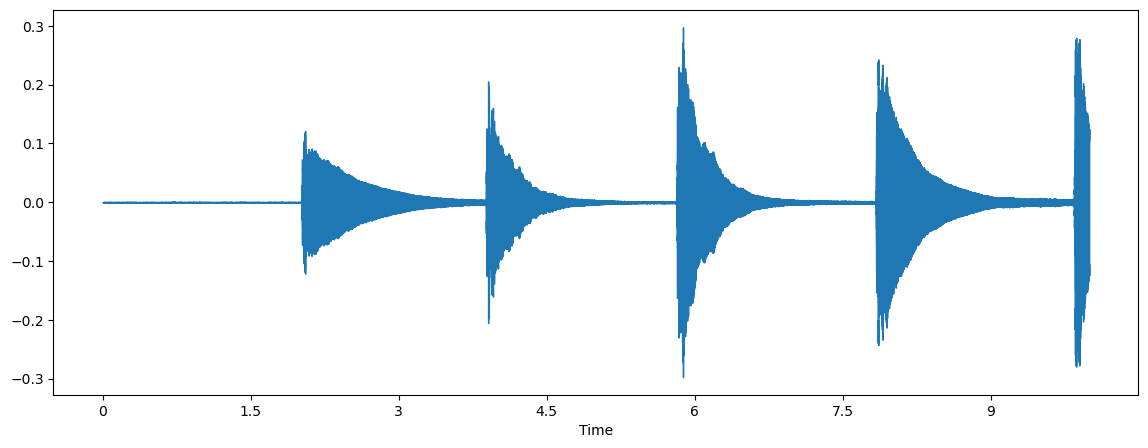

In [130]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x,sr)

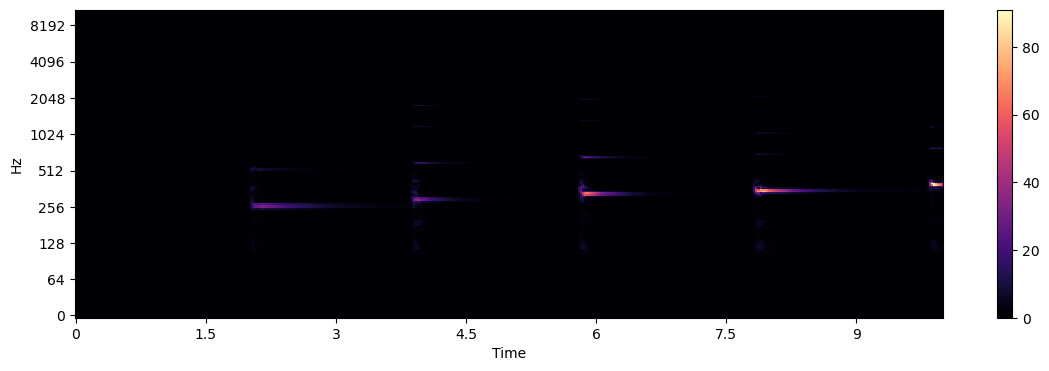

In [161]:
S = librosa.stft(x)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 4))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [156]:
X, X_phase = librosa.magphase(S)
onsets = librosa.onset.onset_detect(y=x, sr=sr, units='time')
n_components = len(onsets)
W, H = librosa.decompose.decompose(X,n_components=n_components, sort=True)

In [170]:
S.shape
x.shape

(220500,)

W contains information about the frequencies\
H contains information about temporal properties.

258.1463414634146
290.4146341463415
333.4390243902439
344.1951219512195
387.219512195122


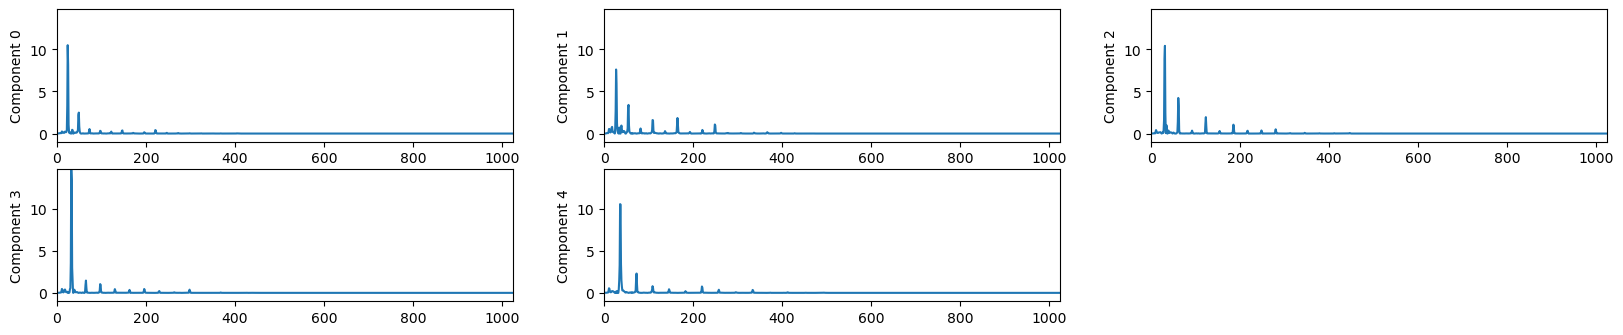

In [169]:
plt.figure(figsize=(20, 10))
for n in range(n_components):
    plt.subplot(5, 3, n+1)
    plt.plot(W[:,n])
    plt.ylim(-1, W.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)
    print(np.argmax(W[:,n]) * 11025/1025)

2.1577726218097446
3.9443155452436196
5.893271461716937
7.911832946635731
9.883990719257541


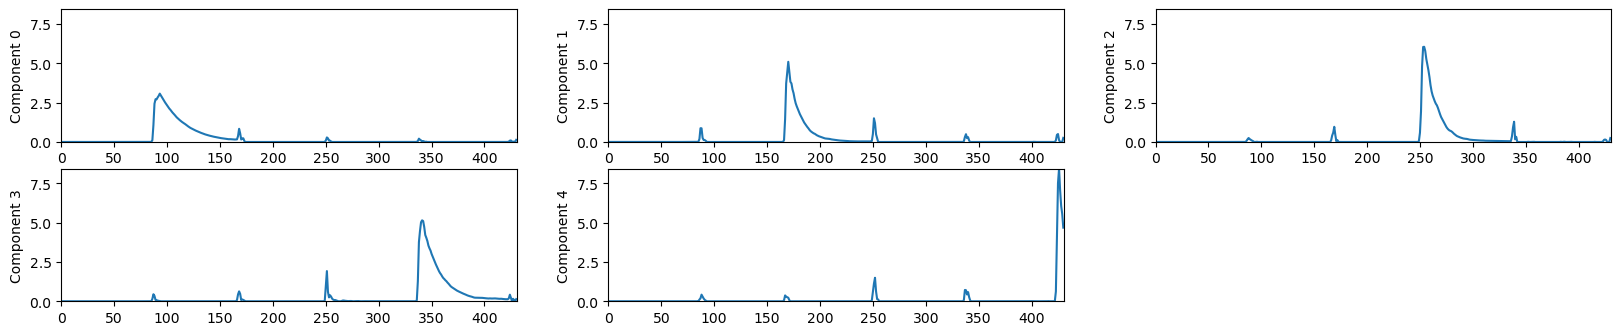

In [181]:
plt.figure(figsize=(20, 10))
for n in range(n_components):
    plt.subplot(5, 3, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)
    print(np.argmax(H[n]) * 10/431)